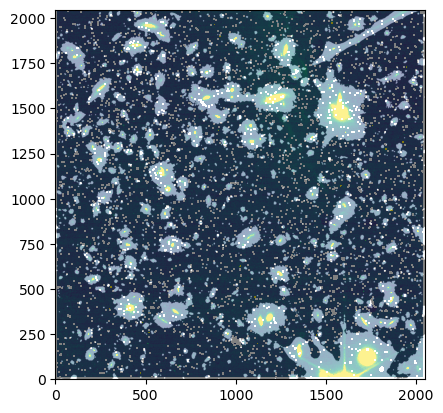

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

filename = './data/jw01286001001_07201_00003_nrcb4_rate.fits'
maskfile = './data/jw01286001001_07201_00003_nrcb4_cal_bkgsub_tweak_smask-full.fits'

data = fits.open(filename)['SCI'].data
err  = fits.open(filename)['ERR'].data
mask = fits.open(maskfile)[0].data
plt.imshow(data, origin='lower', vmin=np.nanpercentile(data, 1), vmax=np.nanpercentile(data, 99))
plt.imshow(mask, origin='lower', vmin=0, vmax=1, alpha=0.5, cmap='gray')

In [ ]:
filter_name = 'F150W'
detector_name = 'nrcb4'
wisp_path = './library'
from nmfwisp import fit_wisp
wisp, wisp_e = fit_wisp(data, err, mask, wisp_path, detector_name, filter_name, correct_1f=False)
updated_err = np.sqrt(err**2 + wisp_e**2)

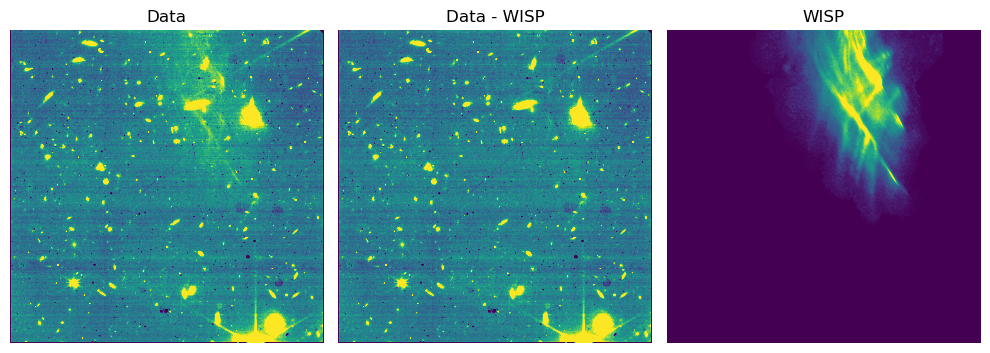

In [3]:
data0 = np.nan_to_num(data, nan=0.0)
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
vmin, vmax = np.nanpercentile(data, 5), np.nanpercentile(data, 95)
ax[0].imshow(data0, origin='lower', vmin=vmin, vmax=vmax)
ax[0].set_title('Data')
ax[1].imshow(data0 - wisp, origin='lower', vmin=vmin, vmax=vmax)
ax[1].set_title('Data - WISP')
ax[2].imshow(wisp, origin='lower', vmin=0, vmax=np.nanpercentile(wisp, 99))
ax[2].set_title('WISP')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

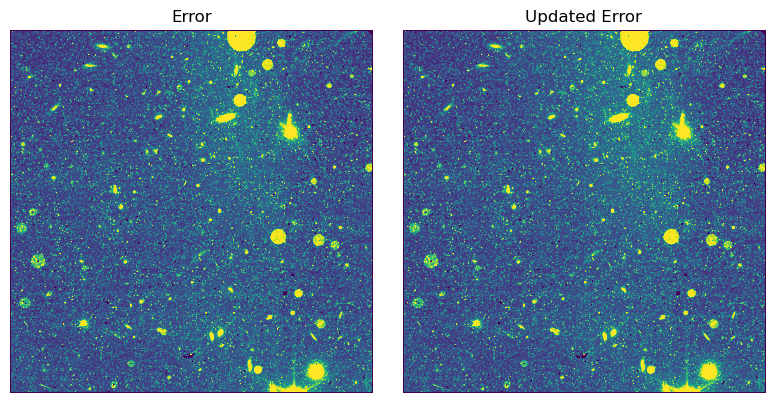

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
vmin, vmax = np.nanpercentile(err, 5), np.nanpercentile(err, 95)
ax[0].imshow(err, origin='lower', vmin=vmin, vmax=vmax)
ax[0].set_title('Error')
ax[1].imshow(updated_err, origin='lower', vmin=vmin, vmax=vmax)
ax[1].set_title('Updated Error')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()